# Generaion of time series data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

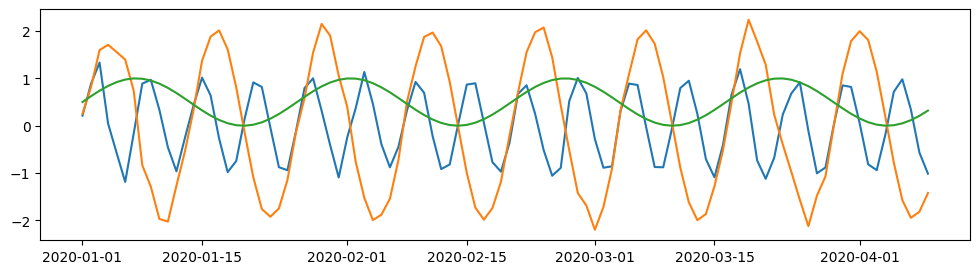

In [2]:
N = 2000
level = (np.sin(np.linspace(0, N/4, N)) + 1) / 2
data = pd.DataFrame({
    'X1': np.sin(np.linspace(0, N/1, N)) + np.random.randn(N)*level*0.2,
    'X2': np.sin(np.linspace(0, N/2, N))*2 + np.random.randn(N)*level*0.2,
    'X3': level,
}, index=pd.date_range('2020-01-01', periods=N, freq='D'))

plt.figure(figsize=(12, 3))
plt.plot(data.iloc[:100]);

### Vector AR

In [3]:
from genrisk.generation import VectorAR

In [4]:
gen = VectorAR(
    target_columns=['X1', 'X2'], 
    conditional_columns=['X3'],
    k_ar=5,
)
gen.fit(data)

In [5]:
fake_data = gen.sample(data.iloc[:100], n_samples=1)
fake_data[0].head()

,X1,X2,X3
2020-01-01,0.323314,0.143425,0.500000
2020-01-02,0.360153,-0.207937,0.623763
2020-01-03,0.226574,-0.115804,0.739823
2020-01-04,-0.236412,-0.262242,0.840957
2020-01-05,-0.642644,-0.351495,0.920871


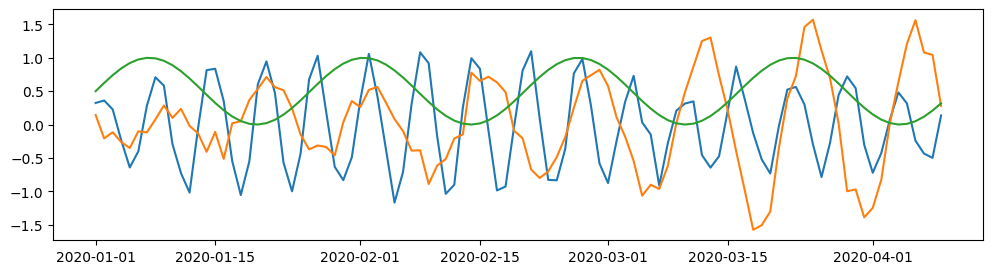

In [6]:
plt.figure(figsize=(12, 3))
plt.plot(fake_data[0]);

### LSTM VAE

In [7]:
from genrisk.generation import LSTMVAE

In [8]:
gen = LSTMVAE(
    target_columns=['X1', 'X2'], 
    conditional_columns=['X3'],
    hidden_dim=16,
    latent_dim=1,
    num_layers=1,
    window_size=20,
    batch_size=16,
    num_epochs=20,
    verbose=True,
    lr=0.001,
)
gen.fit(data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type         | Params
--------------------------------------
0 | enc  | _LSTMEncoder | 1.4 K 
1 | dec  | _LSTMDecoder | 1.3 K 
--------------------------------------
2.7 K     Trainable params
0         Non-trainable params
2.7 K     Total params
0.011     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


In [9]:
fake_data = gen.sample(data.iloc[:100], n_samples=1)
fake_data[0].head()

,X1,X2,X3
2020-01-01,0.112420,-1.447406,0.500000
2020-01-02,-0.355681,-1.251959,0.623763
2020-01-03,-0.319460,-1.248050,0.739823
2020-01-04,-0.119121,-0.484307,0.840957
2020-01-05,0.702756,0.792683,0.920871


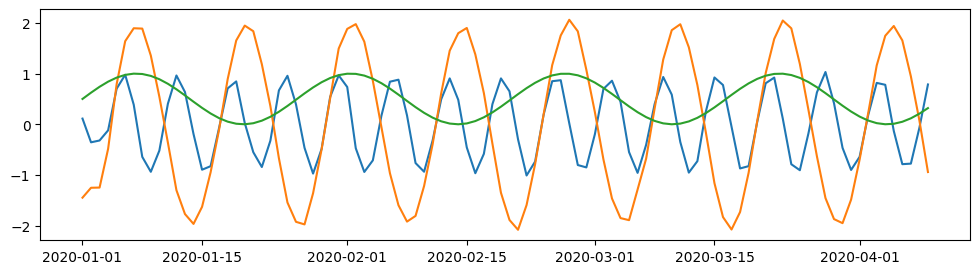

In [10]:
plt.figure(figsize=(12, 3))
plt.plot(fake_data[0]);

### LSTM GAN

In [11]:
from genrisk.generation import LSTMGAN

In [12]:
gen = LSTMGAN(
    target_columns=['X1', 'X2'],
    conditional_columns=['X3'],
    hidden_dim=16,
    latent_dim=1,
    num_layers=1,
    num_disc_steps=3,
    window_size=20,
    batch_size=16,
    num_epochs=30,
    verbose=True,
    lr=0.01,
)
gen.fit(data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type               | Params
--------------------------------------------
0 | gen  | _LSTMGenerator     | 1.3 K 
1 | disc | _LSTMDiscriminator | 1.4 K 
--------------------------------------------
2.7 K     Trainable params
0         Non-trainable params
2.7 K     Total params
0.011     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


In [13]:
fake_data = gen.sample(data.iloc[:100], n_samples=1)
fake_data[0].head()

,X1,X2,X3
2020-01-01,0.491446,0.485904,0.500000
2020-01-02,0.574096,1.179143,0.623763
2020-01-03,-0.381308,1.749532,0.739823
2020-01-04,-0.839454,1.861985,0.840957
2020-01-05,-0.866411,1.746729,0.920871


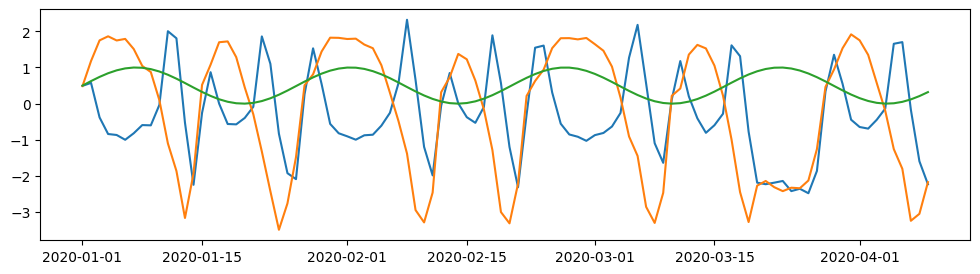

In [14]:
plt.figure(figsize=(12, 3))
plt.plot(fake_data[0]);

### TCN VAE

In [15]:
from genrisk.generation import TCNVAE

In [16]:
gen = TCNVAE(
    target_columns=['X1', 'X2'], 
    conditional_columns=['X3'],
    hidden_dim=16,
    latent_dim=1,
    num_layers=2,
    kernel_size=3,
    window_size=20,
    batch_size=16,
    num_epochs=20,
    verbose=True,
    lr=0.001,
)
gen.fit(data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type        | Params
-------------------------------------
0 | enc  | _TCNEncoder | 2.6 K 
1 | dec  | _TCNDecoder | 2.5 K 
-------------------------------------
5.2 K     Trainable params
0         Non-trainable params
5.2 K     Total params
0.021     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


In [17]:
fake_data = gen.sample(data.iloc[:100], n_samples=1)
fake_data[0].head()

,X1,X2,X3
2020-01-01,-0.208905,-1.325913,0.500000
2020-01-02,0.059877,0.014279,0.623763
2020-01-03,0.490601,0.650976,0.739823
2020-01-04,0.224370,1.283684,0.840957
2020-01-05,-0.640547,1.498322,0.920871


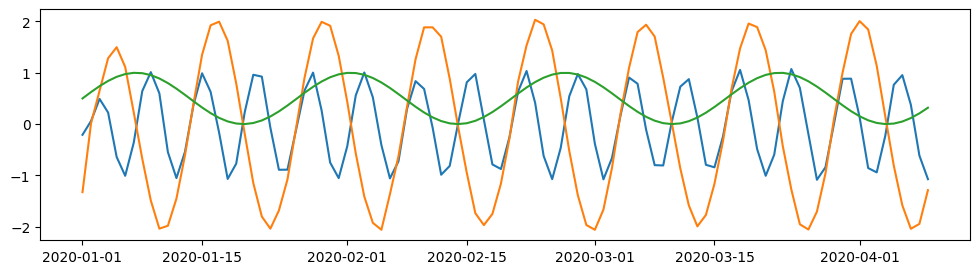

In [18]:
plt.figure(figsize=(12, 3))
plt.plot(fake_data[0]);

### TCN GAN

In [19]:
from genrisk.generation import TCNGAN

In [20]:
gen = TCNGAN(
    target_columns=['X1', 'X2'], 
    conditional_columns=['X3'],
    hidden_dim=16,
    latent_dim=1,
    num_layers=2,
    kernel_size=3,
    num_disc_steps=3,
    window_size=20,
    batch_size=16,
    num_epochs=20,
    verbose=True,
    lr=0.001,
)
gen.fit(data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type              | Params
-------------------------------------------
0 | gen  | _TCNGenerator     | 2.5 K 
1 | disc | _TCNDiscriminator | 2.6 K 
-------------------------------------------
5.1 K     Trainable params
0         Non-trainable params
5.1 K     Total params
0.021     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


In [21]:
fake_data = gen.sample(data.iloc[:100], n_samples=1)
fake_data[0].head()

,X1,X2,X3
2020-01-01,-0.197392,-0.063260,0.500000
2020-01-02,0.200804,0.130816,0.623763
2020-01-03,0.392427,1.355023,0.739823
2020-01-04,-0.152821,1.696068,0.840957
2020-01-05,-0.693837,1.959274,0.920871


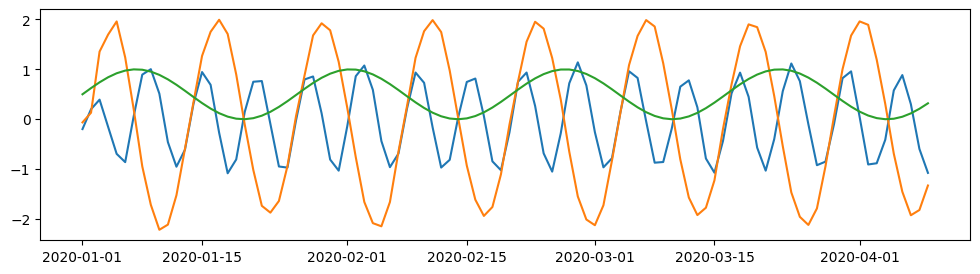

In [22]:
plt.figure(figsize=(12, 3))
plt.plot(fake_data[0]);